In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

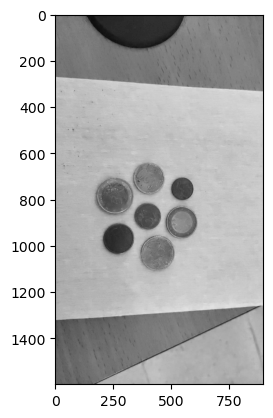

In [27]:
src_monedas = cv.imread("imagenes/moneda_servilleta.jpg")
src_monedas = src_monedas[:, :, 0]



plt.imshow(src_monedas,cmap="gray")

Text(0.5, 1.0, 'Limpio')

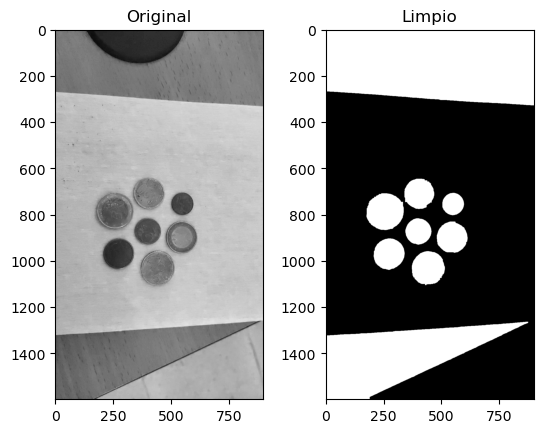

In [28]:
kernel = np.ones((5,5),np.uint8)
src_monedas_dif = cv.GaussianBlur(src=src_monedas, ksize=(5,5), sigmaX=0, sigmaY=0)

ret1,src_monedas_binary = cv.threshold(src_monedas_dif,127,255,cv.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
src_monedas_clean = cv.morphologyEx(src_monedas_binary, cv.MORPH_CLOSE, kernel, iterations=3)

# kernel = np.ones((5,5),np.uint8)
src_monedas_clean = cv.morphologyEx(src_monedas_clean, cv.MORPH_OPEN, kernel, iterations=2)
erosion = cv.erode(src_monedas_clean,kernel,iterations=1)

fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(src_monedas,cmap="gray")
ax1.set_title("Original")
ax2.imshow(erosion,cmap="gray")
ax2.set_title("Limpio")